Email Binary Classification(Spam/Ham)

Our Project Aims To Investigate The Parameters/Factors That Affect Specific Classification AlgorithimsIn Order To Detect Spam Emails With High Accuracy.

In [74]:
import os
import glob
import numpy as np
import email
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

path = './'
easy_ham_paths = glob.glob(path + 'easy_ham/*')
easy_ham_2_paths = glob.glob(path + 'easy_ham_2/*')
hard_ham_paths = glob.glob(path + 'hard_ham/*')
spam_paths = glob.glob(path + 'spam/*')
spam_2_paths = glob.glob(path + 'spam_2/*')

# Function to get email content from a file
def get_email_content(email_path):
    file = open(email_path, encoding='latin1')
    try:
        msg = email.message_from_file(file)
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                return part.get_payload()  # prints the raw text
    except Exception as e:
        print(e)

# Function to get email content for multiple files, with error handling
def get_email_content_bulk(email_paths):
    email_contents = []
    for path in email_paths:
        content = get_email_content(path)
        if content is not None:
            email_contents.append(content)
    return email_contents

# Load data
ham_paths = [easy_ham_paths, easy_ham_2_paths, hard_ham_paths]
spam_paths = [spam_paths, spam_2_paths]

ham_data = [get_email_content_bulk(path_list) for path_list in ham_paths]
spam_data = [get_email_content_bulk(path_list) for path_list in spam_paths]

ham_labels = np.zeros(sum(len(data) for data in ham_data))
spam_labels = np.ones(sum(len(data) for data in spam_data))

# Combine the data and labels
all_data = np.concatenate((ham_data[0], ham_data[1], ham_data[2], spam_data[0], spam_data[1]))
all_labels = np.concatenate((ham_labels, spam_labels))

# Calculate the total number of emails
total_emails = len(all_data)

# Calculate the number of ham and spam emails
num_ham_emails = np.sum(all_labels == 0)
num_spam_emails = np.sum(all_labels == 1)


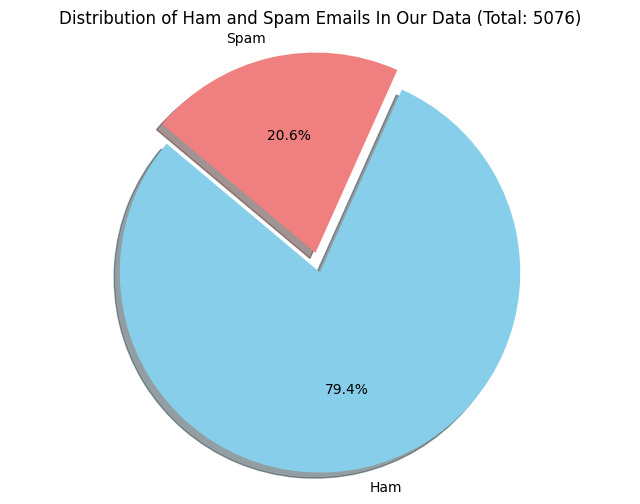

In [75]:

# Create a pie chart
labels = ['Ham', 'Spam']
sizes = [num_ham_emails, num_spam_emails]
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1)  # explode the second slice (Spam)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Ham and Spam Emails In Our Data (Total: {})'.format(total_emails))
plt.show()

We Can See That The Data Is Not Balance In The Spam/Ham Distribution, this can be managed by using class-weighting.

Lets Try The Naive Bayse Approach.

Accuracy: 0.9557
Precision: 0.8761
Recall: 0.9139
F1 Score: 0.8946


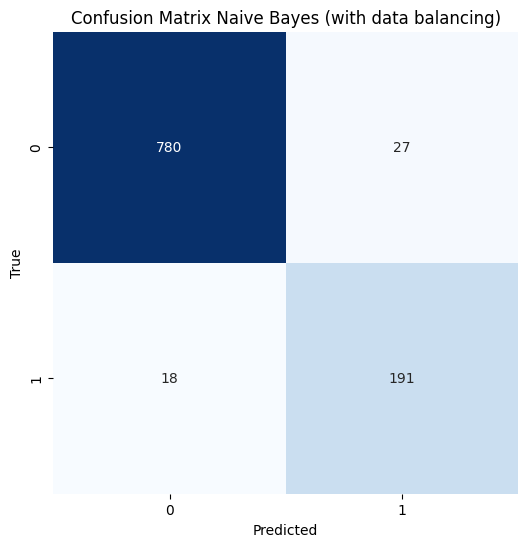

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split data into training and testing sets while maintaining the class proportions
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Create a pipeline with SMOTE and RUS for data balancing
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Use SMOTE to oversample the minority class to have 50% of the majority class size
    ('rus', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),  # Use RUS to undersample the majority class to have the same size as the minority class
    ('nb', nb_classifier)
])

# Train the classifier on the balanced data
pipeline.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_tfidf.toarray())

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes (with data balancing)')
plt.show()


Lets Investigate The Times Our Model Has Guessed Incorrectly 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most used words in false_Ham:
            Word  Frequency
3818        the        518
497         and        446
3867         to        350
1904       http        296
2606        net        234
2683         of        227
1669  freshmeat        222
2077         is        215
2262    license        214
1629        for        210
2089         it        188
1969         in        173
773          by        156
4020      users        130
392       about        127
175        2002        121
4009        url        115
3017   projects        109
3927    tuesday        108
216        30th        107

Most used words in false_Spam:
       Word  Frequency
6071    mv       1400
8224   you        116
7287   the        112
7344    to        108
3431   and         90
2008    3d         80
6265    of         68
4083   com         57
5333    in         57
8226  your         47
4906   for         44
1727    20         42
7303  this         40
5249  http         39
7286  that         38
6314    or      

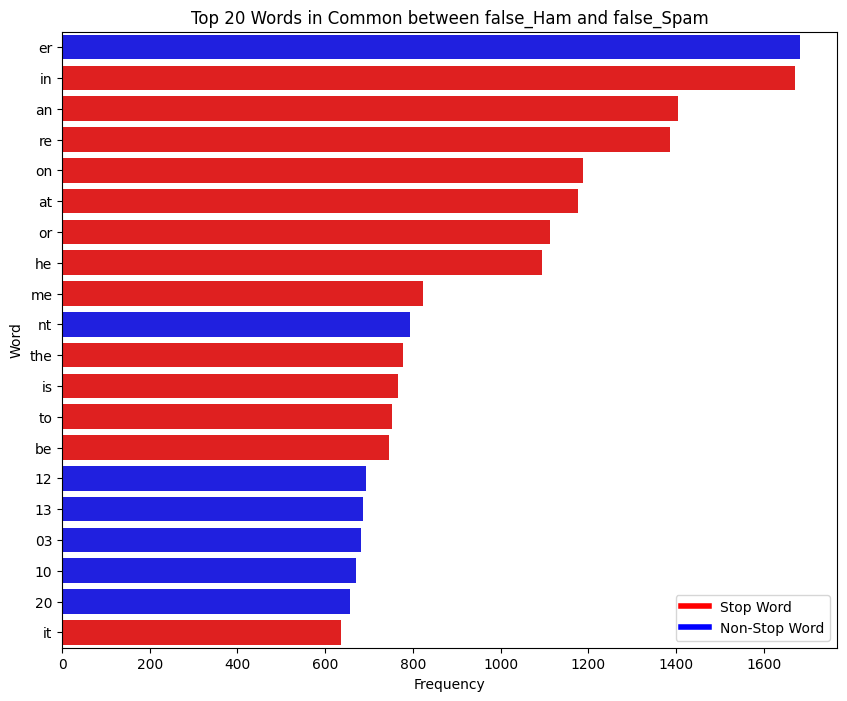

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most used words in false_Ham:
            Word  Frequency
3818        the        518
497         and        446
3867         to        350
1904       http        296
2606        net        234
2683         of        227
1669  freshmeat        222
2077         is        215
2262    license        214
1629        for        210
2089         it        188
1969         in        173
773          by        156
4020      users        130
392       about        127
175        2002        121
4009        url        115
3017   projects        109
3927    tuesday        108
216        30th        107

Most used words in false_Spam:
       Word  Frequency
6071    mv       1400
8224   you        116
7287   the        112
7344    to        108
3431   and         90
2008    3d         80
6265    of         68
4083   com         57
5333    in         57
8226  your         47
4906   for         44
1727    20         42
7303  this         40
5249  http         39
7286  that         38
6314    or      

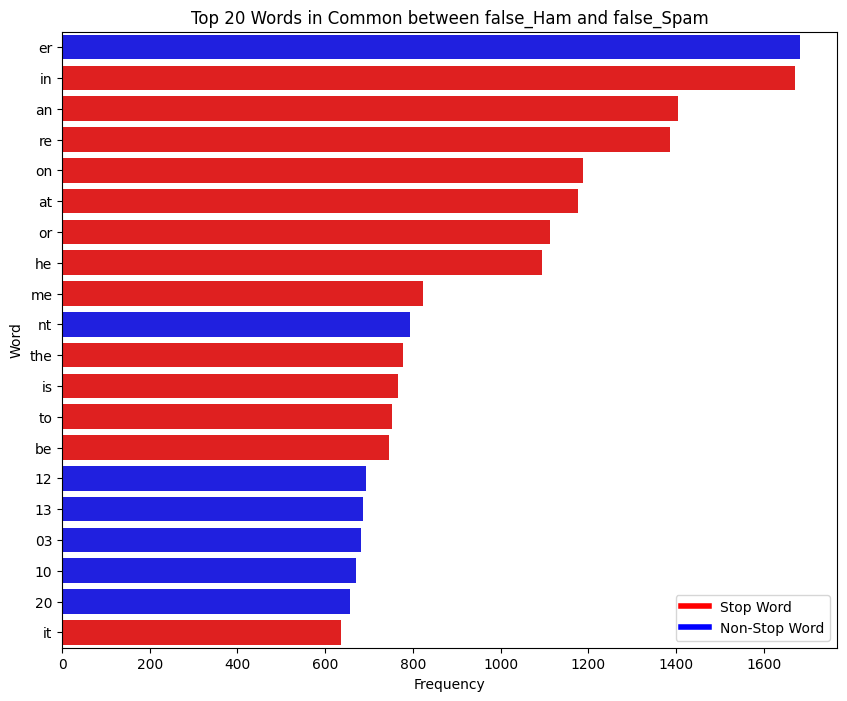

In [77]:
import random
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Download the list of English stop words if not already downloaded
nltk.download('stopwords')

# Get the English stop words from both NLTK and sklearn
nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(ENGLISH_STOP_WORDS)

# Combine both sets of stop words
english_stop_words = nltk_stop_words.union(sklearn_stop_words)

# Identify false predictions
false_ham_indices = np.where((y_test == 0) & (y_pred == 1))[0]
false_spam_indices = np.where((y_test == 1) & (y_pred == 0))[0]

# Get false ham and spam email contents
false_ham = [X_test[i] for i in false_ham_indices]
false_spam = [X_test[i] for i in false_spam_indices]

# Count word frequencies in each array
false_ham_texts = " ".join(false_ham)
false_spam_texts = " ".join(false_spam)

false_ham_vectorizer = CountVectorizer()
false_ham_vectorized = false_ham_vectorizer.fit_transform([false_ham_texts])
false_ham_word_counts = np.array(false_ham_vectorized.sum(axis=0)).flatten()

false_spam_vectorizer = CountVectorizer()
false_spam_vectorized = false_spam_vectorizer.fit_transform([false_spam_texts])
false_spam_word_counts = np.array(false_spam_vectorized.sum(axis=0)).flatten()

# Get the most used words in each array
def get_most_used_words(vectorizer, word_counts, category):
    words = np.array(vectorizer.get_feature_names_out())
    word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_counts})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Show the top 20 most used words
    print(f"\nMost used words in {category}:\n", word_freq_df)

get_most_used_words(false_ham_vectorizer, false_ham_word_counts, "false_Ham")
get_most_used_words(false_spam_vectorizer, false_spam_word_counts, "false_Spam")

# Find common words between the two arrays
common_words = set(false_ham_vectorizer.get_feature_names_out()).intersection(false_spam_vectorizer.get_feature_names_out())

# Convert sets to lists for Venn diagram labels
false_ham_list = list(false_ham_vectorizer.get_feature_names_out())
false_spam_list = list(false_spam_vectorizer.get_feature_names_out())

# Plot the intersection words
common_words_freq = []

# Predefine a set of colors for the stop words
stop_word_colors = {word: 'red' for word in english_stop_words}

# Use blue for non-stop words
non_stop_word_color = 'blue'

for word in common_words:
    frequency = false_ham_texts.count(word) + false_spam_texts.count(word)
    color = stop_word_colors.get(word, non_stop_word_color)  # Use red if it's an English stop word, otherwise use blue
    common_words_freq.append((word, frequency, color))

common_words_freq.sort(key=lambda x: x[1], reverse=True)
common_words_df = pd.DataFrame(common_words_freq, columns=['Word', 'Frequency', 'Color'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df.head(20), palette=common_words_df['Color'].head(20))
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Words in Common between false_Ham and false_Spam')

# Add custom legend
legend_elements = [plt.Line2D([0], [0], color='red', lw=4, label='Stop Word'),
                   plt.Line2D([0], [0], color='blue', lw=4, label='Non-Stop Word')]
plt.legend(handles=legend_elements)

plt.show()
import random
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Download the list of English stop words if not already downloaded
nltk.download('stopwords')

# Get the English stop words from both NLTK and sklearn
nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(ENGLISH_STOP_WORDS)

# Combine both sets of stop words
english_stop_words = nltk_stop_words.union(sklearn_stop_words)

# Identify false predictions
false_ham_indices = np.where((y_test == 0) & (y_pred == 1))[0]
false_spam_indices = np.where((y_test == 1) & (y_pred == 0))[0]

# Get false ham and spam email contents
false_ham = [X_test[i] for i in false_ham_indices]
false_spam = [X_test[i] for i in false_spam_indices]

# Count word frequencies in each array
false_ham_texts = " ".join(false_ham)
false_spam_texts = " ".join(false_spam)

false_ham_vectorizer = CountVectorizer()
false_ham_vectorized = false_ham_vectorizer.fit_transform([false_ham_texts])
false_ham_word_counts = np.array(false_ham_vectorized.sum(axis=0)).flatten()

false_spam_vectorizer = CountVectorizer()
false_spam_vectorized = false_spam_vectorizer.fit_transform([false_spam_texts])
false_spam_word_counts = np.array(false_spam_vectorized.sum(axis=0)).flatten()

# Get the most used words in each array
def get_most_used_words(vectorizer, word_counts, category):
    words = np.array(vectorizer.get_feature_names_out())
    word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_counts})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # Show the top 20 most used words
    print(f"\nMost used words in {category}:\n", word_freq_df)

get_most_used_words(false_ham_vectorizer, false_ham_word_counts, "false_Ham")
get_most_used_words(false_spam_vectorizer, false_spam_word_counts, "false_Spam")

# Find common words between the two arrays
common_words = set(false_ham_vectorizer.get_feature_names_out()).intersection(false_spam_vectorizer.get_feature_names_out())

# Convert sets to lists for Venn diagram labels
false_ham_list = list(false_ham_vectorizer.get_feature_names_out())
false_spam_list = list(false_spam_vectorizer.get_feature_names_out())

# Plot the intersection words
common_words_freq = []

# Predefine a set of colors for the stop words
stop_word_colors = {word: 'red' for word in english_stop_words}

# Use blue for non-stop words
non_stop_word_color = 'blue'

for word in common_words:
    frequency = false_ham_texts.count(word) + false_spam_texts.count(word)
    color = stop_word_colors.get(word, non_stop_word_color)  # Use red if it's an English stop word, otherwise use blue
    common_words_freq.append((word, frequency, color))

common_words_freq.sort(key=lambda x: x[1], reverse=True)
common_words_df = pd.DataFrame(common_words_freq, columns=['Word', 'Frequency', 'Color'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=common_words_df.head(20), palette=common_words_df['Color'].head(20))
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Words in Common between false_Ham and false_Spam')

# Add custom legend
legend_elements = [plt.Line2D([0], [0], color='red', lw=4, label='Stop Word'),
                   plt.Line2D([0], [0], color='blue', lw=4, label='Non-Stop Word')]
plt.legend(handles=legend_elements)

plt.show()


We Can See by Looking in the Bar Chart Above Plotting the Most Common Words in Emails We Misclassified, that most of the words are common English stop words that can be dropped without losing the general meaning of an email,
we can also take notice that numbers in emails are confusing our model, and dropping numbers wouldn't make the email lose value, we can also assume that punctuation, capitalization, and special character can confuse our model.

To Better Understand Our Data Let's plot The Most Used Word In Each Class of Emails.

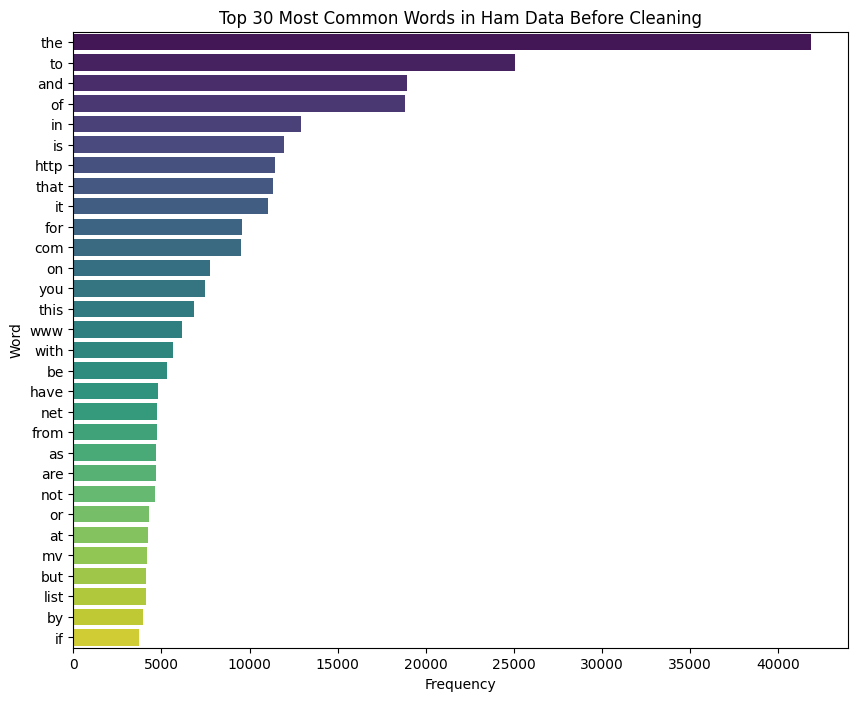

In [78]:
# Flatten the ham_data list
ham_data_flat = list(itertools.chain.from_iterable(ham_data))

# Create a CountVectorizer for ham data
ham_vectorizer = CountVectorizer()
X_ham_count = ham_vectorizer.fit_transform(ham_data_flat)

# Calculate the word frequencies
ham_word_counts = np.array(X_ham_count.sum(axis=0)).flatten()

# Get the most common words and their frequencies
ham_words = np.array(ham_vectorizer.get_feature_names_out())
ham_word_freq_df = pd.DataFrame({'Word': ham_words, 'Frequency': ham_word_counts})
ham_word_freq_df = ham_word_freq_df.sort_values(by='Frequency', ascending=False).head(30)

# Plot the top 30 most common words in ham data
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=ham_word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Ham Data Before Cleaning')
plt.show()


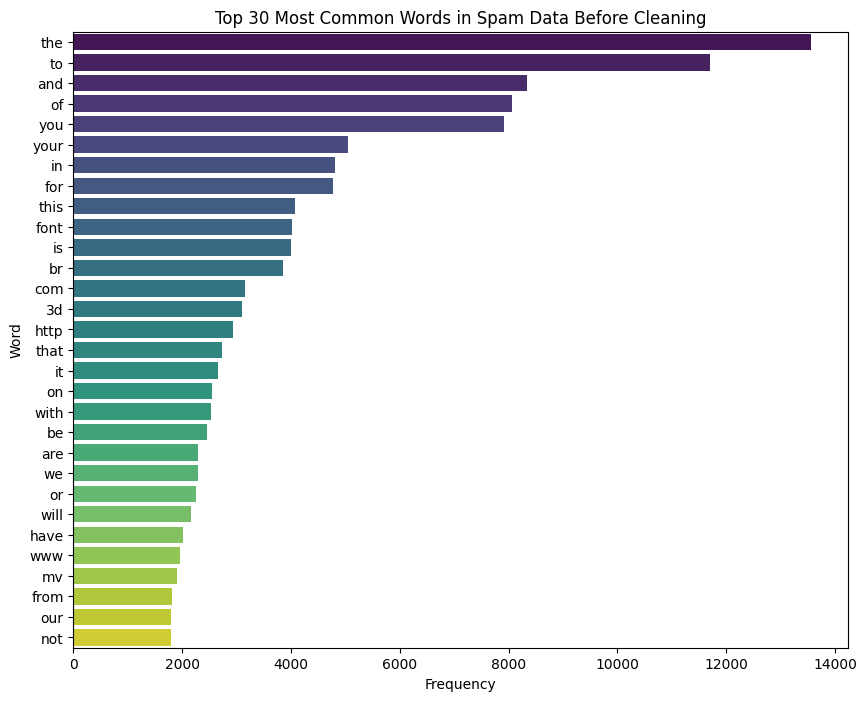

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Flatten the spam_data list
spam_data_flat = list(itertools.chain.from_iterable(spam_data))

# Create a CountVectorizer for spam data
spam_vectorizer = CountVectorizer()
X_spam_count = spam_vectorizer.fit_transform(spam_data_flat)

# Calculate the word frequencies
spam_word_counts = np.array(X_spam_count.sum(axis=0)).flatten()

# Get the most common words and their frequencies
spam_words = np.array(spam_vectorizer.get_feature_names_out())
spam_word_freq_df = pd.DataFrame({'Word': spam_words, 'Frequency': spam_word_counts})
spam_word_freq_df = spam_word_freq_df.sort_values(by='Frequency', ascending=False).head(30)

# Plot the top 30 most common words in spam data
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Word', data=spam_word_freq_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Data Before Cleaning')
plt.show()


We Can See That The Most Common Words In Spam Or Ham Are Not Unique Since We have Alot Of Common Stop Word That Are populating Both Unnecessarily 

Cleaning The Data

Here We Drop All numbers,Punctuation,Capitalization,Links and common English Stopwords.

In [80]:
import os
import glob
import numpy as np
import email
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
# Import the Snowball stemmer
from nltk.stem import SnowballStemmer

# Function to clean and preprocess the email content
def clean_text(email_content):
    # Convert to lowercase
    email_content = email_content.lower()

    # Remove hyperlinks
    email_content = ' '.join(word for word in email_content.split() if not word.startswith('http'))

    # Remove special characters, symbols, and numbers
    email_content = ''.join(char for char in email_content if char.isalpha() or char.isspace())

    # Tokenize the text (split into words)
    words = nltk.word_tokenize(email_content)

    # Remove punctuation
    words = [word for word in words if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Stemming using Snowball stemmer
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]

    # Join the cleaned words back into a string
    cleaned_content = ' '.join(words)

    return cleaned_content

# Clean and preprocess all email contents
all_data_cleaned = [clean_text(email_content) for email_content in all_data]

# Print the first ten cleaned emails
print("First ten cleaned emails:")
for i in range(10):
    print(f"Email {i + 1}:")
    print(all_data_cleaned[i])
    print("----------------------------") 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First ten cleaned emails:
Email 1:
date wed aug chris garrigu cwgdatedfaddeepeddycom messageid tmdadeepeddyvirciocom cant reproduc error repeat like everi time without fail debug log pick happen pickit exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequenc mercuri exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequenc mercuri ftocpickmsg hit mark hit tkerror syntax error express int note run pick command hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace sequenc mercuri hit that hit come obvious version nmh im use delta pick version pick nmh compil fuchsiacsmuozau sun mar ict relev part mhprofil delta mhparam pick seq sel list sinc pick command work sequenc actual one that explicit command line search popup one come mhprofil get creat kre p still use version code form day ago havent abl reach cv repositori today local rout issu think exmhwork mail list exmhworkersredhatcom
----------------------------
Email 2:
martin post tasso papadopoulo gr

Lets See The Most Common Used Words In Each Class Of Data After It Has Been Cleaned.

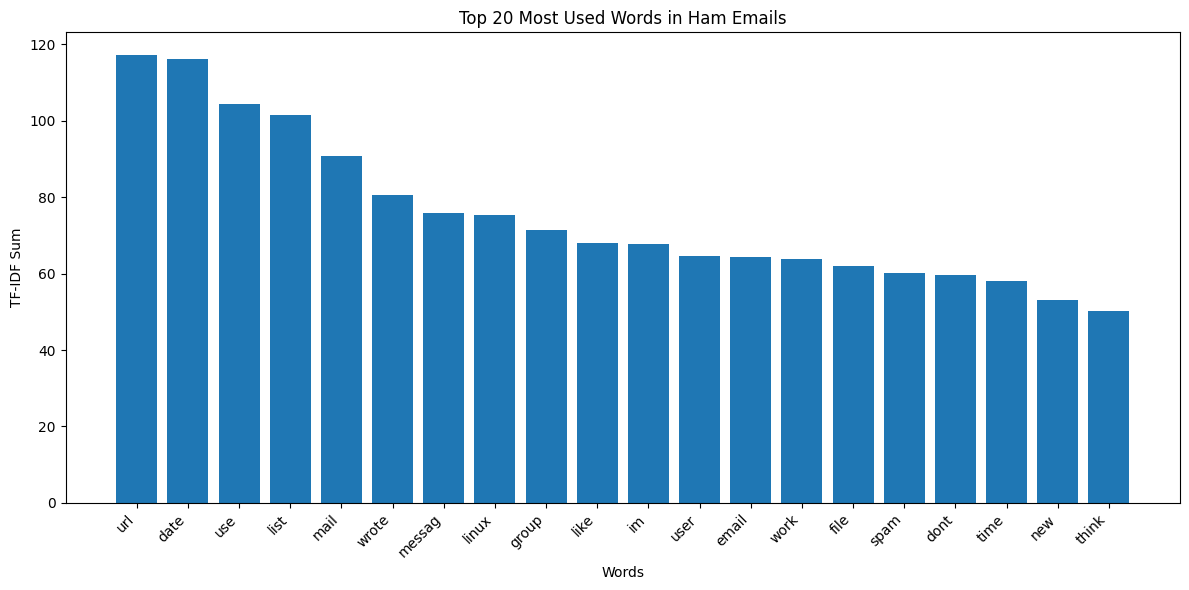

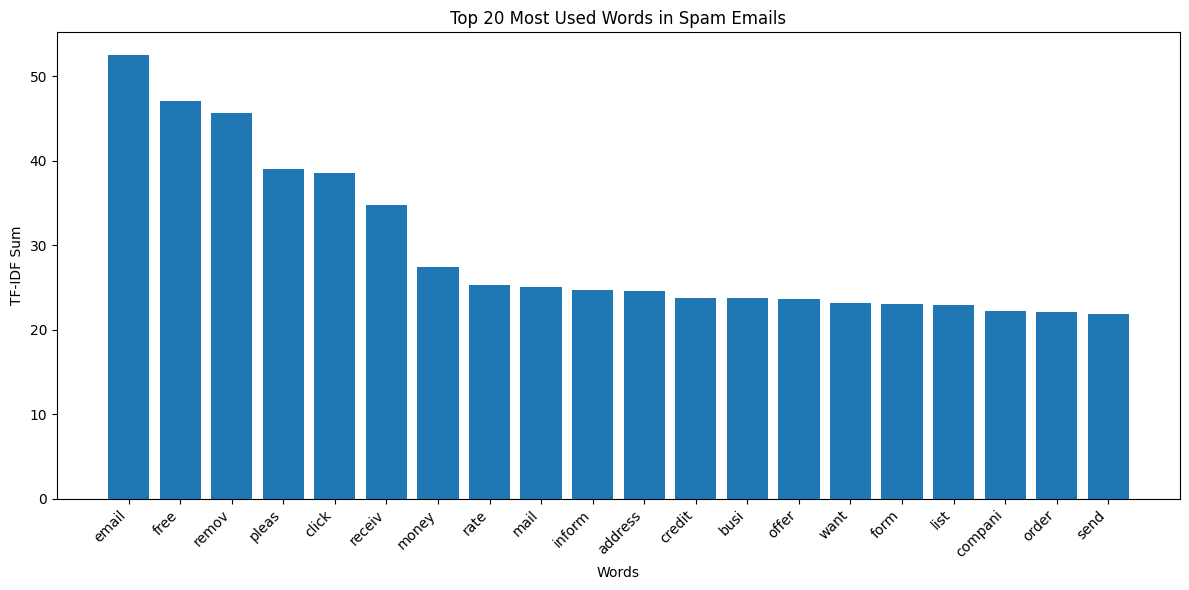

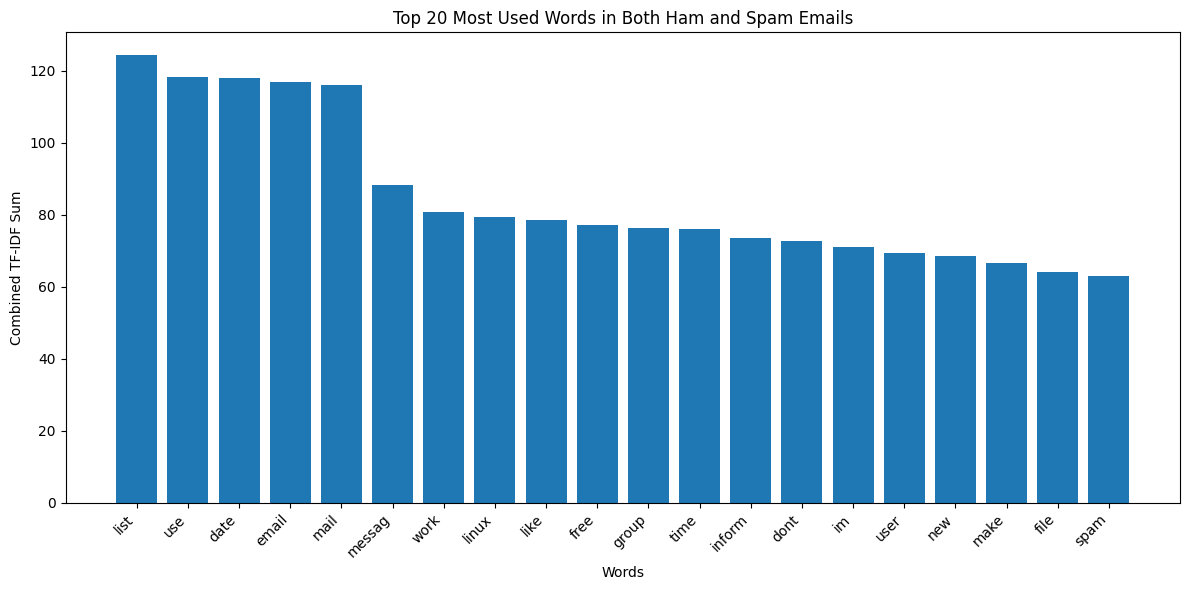

In [81]:
import matplotlib.pyplot as plt

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit and transform the data to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(all_data_cleaned)

# Separate the ham and spam data based on labels
ham_indices = np.where(all_labels == 0)[0]
spam_indices = np.where(all_labels == 1)[0]

ham_tfidf_matrix = tfidf_matrix[ham_indices]
spam_tfidf_matrix = tfidf_matrix[spam_indices]

# Calculate the sum of TF-IDF values for each word in ham and spam emails
ham_word_tfidf_sum = np.asarray(ham_tfidf_matrix.sum(axis=0)).squeeze()
spam_word_tfidf_sum = np.asarray(spam_tfidf_matrix.sum(axis=0)).squeeze()

# Get the feature names (words) from the TF-IDF vectorizer
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sort the indices based on the TF-IDF sum to get the most used words
top_1000_ham_indices = np.argsort(ham_word_tfidf_sum)[::-1][:1000]
top_1000_spam_indices = np.argsort(spam_word_tfidf_sum)[::-1][:1000]

# Get the top 1000 most used words in ham and spam
top_1000_ham_words = feature_names[top_1000_ham_indices]
top_1000_spam_words = feature_names[top_1000_spam_indices]

# Plot the bar graph for top 20 ham words
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_1000_ham_words[:20])), ham_word_tfidf_sum[top_1000_ham_indices[:20]], align='center')
plt.xticks(range(len(top_1000_ham_words[:20])), top_1000_ham_words[:20], rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('TF-IDF Sum')
plt.title('Top 20 Most Used Words in Ham Emails')
plt.tight_layout()
plt.show()

# Plot the bar graph for top 20 spam words
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_1000_spam_words[:20])), spam_word_tfidf_sum[top_1000_spam_indices[:20]], align='center')
plt.xticks(range(len(top_1000_spam_words[:20])), top_1000_spam_words[:20], rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('TF-IDF Sum')
plt.title('Top 20 Most Used Words in Spam Emails')
plt.tight_layout()
plt.show()

# Find the indices of the words that appear in both ham and spam emails
common_word_indices = np.intersect1d(top_1000_ham_indices, top_1000_spam_indices)

# Calculate the combined TF-IDF sum of those words in both ham and spam emails
combined_word_tfidf_sum = ham_word_tfidf_sum[common_word_indices] + spam_word_tfidf_sum[common_word_indices]

# Sort the combined TF-IDF sums to get the top 20 most used words
top_20_common_indices = np.argsort(combined_word_tfidf_sum)[::-1][:20]

# Get the top 20 most used words that intersect in both ham and spam
top_20_common_words = feature_names[common_word_indices][top_20_common_indices]

# Plot the bar graph for the common words
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_20_common_words)), combined_word_tfidf_sum[top_20_common_indices], align='center')
plt.xticks(range(len(top_20_common_words)), top_20_common_words, rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Combined TF-IDF Sum')
plt.title('Top 20 Most Used Words in Both Ham and Spam Emails')
plt.tight_layout()
plt.show()


Let Run Naive Bayse On The Cleaned Data

Accuracy: 0.9370
Precision: 0.8311
Recall: 0.8708
F1 Score: 0.8505


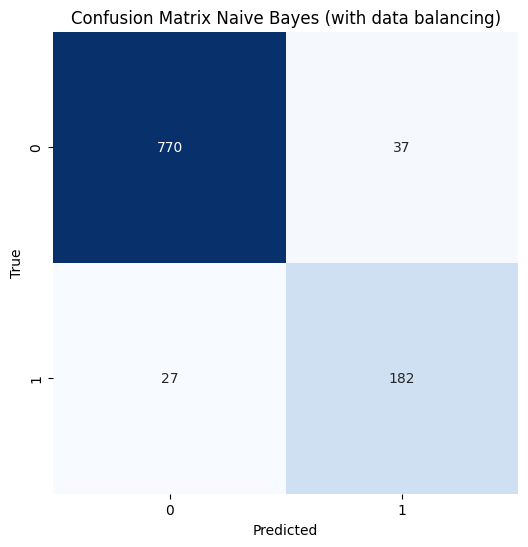

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split data into training and testing sets while maintaining the class proportions
X_train, X_test, y_train, y_test = train_test_split(all_data_cleaned, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Create a pipeline with SMOTE and RUS for data balancing
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Use SMOTE to oversample the minority class to have 50% of the majority class size
    ('rus', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),  # Use RUS to undersample the majority class to have the same size as the minority class
    ('nb', nb_classifier)
])

# Train the classifier on the balanced data
pipeline.fit(X_train_tfidf.toarray(), y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test_tfidf.toarray())

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Naive Bayes (with data balancing)')
plt.show()


Best SVM Classifier Metrics:
Accuracy: 0.9823
Precision: 0.9848
Recall: 0.9282
F1 Score: 0.9557
Cross-Validation F1 Scores: [0.95384615 0.93538462 0.94189602 0.92405063 0.94189602]
Mean F1 Score: 0.939414690214365
Standard Deviation of F1 Scores: 0.009724987833649232


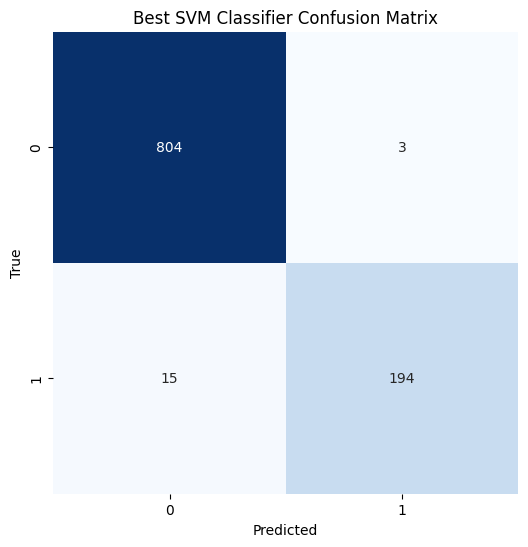

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_tfidf, y_train)

# Get the best SVM classifier with tuned hyperparameters
best_svm_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best SVM classifier
y_pred_svm = best_svm_classifier.predict(X_test_tfidf)

# Calculate metrics for the best SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print metrics for the best SVM classifier
print("Best SVM Classifier Metrics:")
print("Accuracy: {:.4f}".format(accuracy_svm))
print("Precision: {:.4f}".format(precision_svm))
print("Recall: {:.4f}".format(recall_svm))
print("F1 Score: {:.4f}".format(f1_svm))

# Generate and plot the confusion matrix for the best SVM classifier
cm_svm = confusion_matrix(y_test, y_pred_svm)

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best SVM classifier
svm_scores = cross_val_score(best_svm_classifier, X_train_tfidf, y_train, cv=5, scoring='f1')

# Print the cross-validation scores
print("Cross-Validation F1 Scores:", svm_scores)
print("Mean F1 Score:", np.mean(svm_scores))
print("Standard Deviation of F1 Scores:", np.std(svm_scores))


plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Best SVM Classifier Confusion Matrix')
plt.show()


Decision Tree On Unclean Data Then Adaboost On It.

Accuracy: 0.8199
Precision: 0.5774
Recall: 0.4641
F1 Score: 0.5146


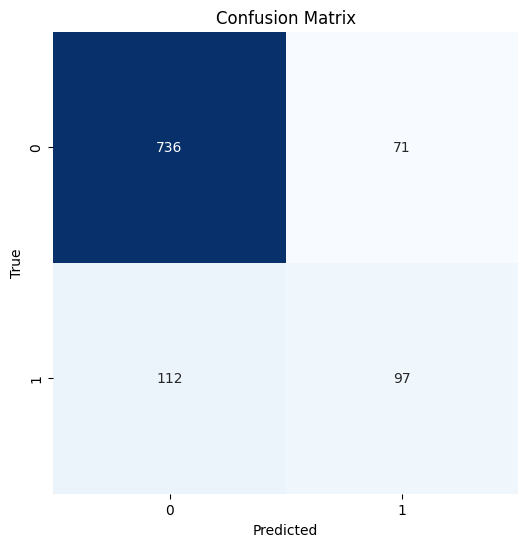

In [84]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

c:\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier Metrics:
Accuracy: 0.9518
Precision: 0.9444
Recall: 0.8134
F1 Score: 0.8740


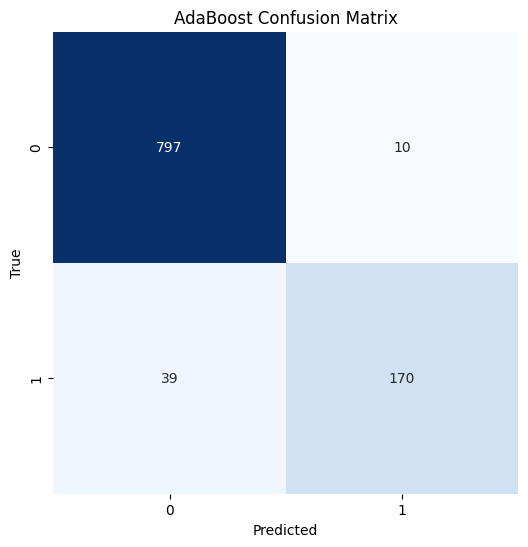

In [85]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier using dt_classifier as the base classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=dt_classifier, random_state=42)
adaboost_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test_tfidf)

# Calculate metrics for AdaBoost classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Print metrics for AdaBoost classifier
print("AdaBoost Classifier Metrics:")
print("Accuracy: {:.4f}".format(accuracy_adaboost))
print("Precision: {:.4f}".format(precision_adaboost))
print("Recall: {:.4f}".format(recall_adaboost))
print("F1 Score: {:.4f}".format(f1_adaboost))

# Generate and plot the confusion matrix for AdaBoost classifier
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('AdaBoost Confusion Matrix')
plt.show()
